# R2-Statistical Learning-Project-2
# Application of Statististics in Healthcare Insurance

### 1. Import the necessary libraries.

In [1]:
#Import numpy package
import numpy as np

#Import pandas package
import pandas as pd

#Import matplotlib.pyplot
import matplotlib.pyplot as plt

#Import seaborn
import seaborn as sns

#Import norm, ttest_ind, mannwhitneyu, chi2_contingency, f_oneway, shapiro, levene from scipy.stats
#norm : to apply normal distribution methods.
#ttest_ind : T-test for the means of two independent samples of scores.
#shapiro : To test that the data was drawn from a normal distribution.
#levene : To test that all input samples are from populations with equal variances.
#mannwhitneyu : Two-sample wilcoxon test or Mann Whitney U - Used when samples are not normally distributed.
#chi2_contingency : Perform Chi-square test of independence of variables in a contingency table.
#f_oneway : Perform One-Way ANOVA to test that two or more groups have the same population mean.

from scipy.stats import norm, ttest_ind, shapiro, levene, mannwhitneyu, chi2_contingency, f_oneway


### 2. Read the data as a data frame

In [2]:
#load the input csv file into a DataFrame using read_csv() method.

ins_df = pd.read_csv('insurance.csv')

In [3]:
#random check if dataframe is loaded correctly using sample() method.

ins_df.sample(5)

,age,sex,bmi,children,smoker,region,charges
607,59,female,23.655,0,yes,northwest,25678.77845
636,19,female,24.510,1,no,northwest,2709.11190
246,60,female,38.060,0,no,southeast,12648.70340
295,18,male,22.990,0,no,northeast,1704.56810
182,22,male,19.950,3,no,northeast,4005.42250


### 3. Perform basic EDA which should include the following and print out your insights at every step.

### a. Shape of the data

In [4]:
#Check the total number of records(rows) and attributes(columns) in the DataFrame using shape

print('\nShape of the data ')
print('===================')

ins_df.shape


Shape of the data 


(1338, 7)

### b. Data type of each attribute

In [5]:
#Check Datatypes of each attribute using dtypes

print('\nDatatype of each attribute')
print('============================')

ins_df.dtypes


Datatype of each attribute


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### c. Checking the presence of missing values

In [6]:
#Check the presence of missing/null values using isna function and count using sum()

print('\nChecking presence of missing values')
print('====================================')

ins_df.isna().sum()


Checking presence of missing values


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
print('\nThere are no missing or null values in the dataset.\n')


There are no missing or null values in the dataset.



### d. 5 point summary of numerical attributes

In [8]:
#Use describe() function to get the 5 point summary and other statistics - count, mean and standard deviation.
#transpose the results for readability.
#Considering children column as categorical and dropping the column,
#since, mean, standard deviation and 5 point summary is not applicable to number of children.

print('\n5 pont summary of numerical attributes')
print('========================================')

ins_df.drop(['children'],axis=1).describe().transpose()



5 pont summary of numerical attributes


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.


Histogram for age, bmi and charges columns


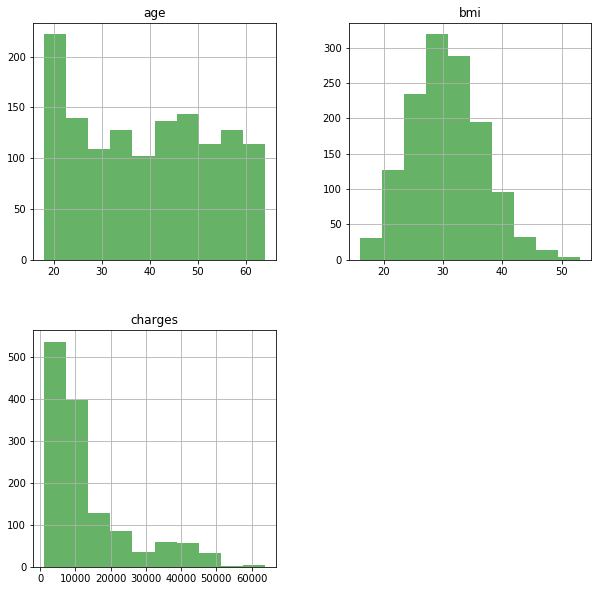

In [9]:
#Using DataFrame.hist() function to plot a histogram to vizualize the distribution of Numeric Columns -
#bmi, age and charges

print('\nHistogram for age, bmi and charges columns')
print('============================================')
ins_df.drop(['children'],axis=1).hist(figsize=(10,10), color='green', alpha=0.6)
plt.show()

In [10]:
print('\nThe histograms for distribution of Numeric columns - bmi, age and charges shows-\n')
print('Distribution of age is NOT NORMAL.')
print('Distribution of bmi is APPROXIMATELY NORMAL.')
print('Distribution of charges is MORE RIGHT SKEWED.\n')


The histograms for distribution of Numeric columns - bmi, age and charges shows-

Distribution of age is NOT NORMAL.
Distribution of bmi is APPROXIMATELY NORMAL.
Distribution of charges is MORE RIGHT SKEWED.



### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [11]:
#Using skew() method to find skewness of the numeric columns.
#Considering children column as categorical and dropping the column.

print('\nSkewness of Numeric Columns bmi, age and charges')
print('==================================================')
ins_df.drop(['children'],axis=1).skew()


Skewness of Numeric Columns bmi, age and charges


age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges‘ columns


boxplot to check the presence of outliers in bmi, age and charges



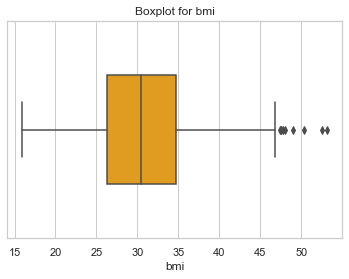

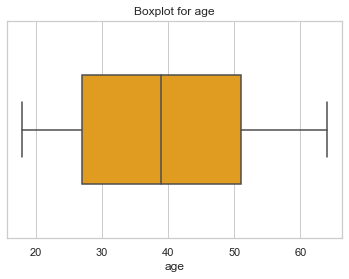

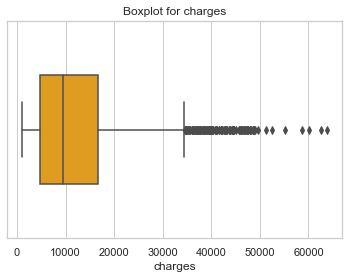

In [12]:
#Using seaborn boxplot to check for presence of outliers in Numeric columns - bmi, age and charges.

print('\nboxplot to check the presence of outliers in bmi, age and charges')
print('===================================================================\n')

for col in ['bmi', 'age', 'charges']:
    sns.set(style='whitegrid')
    sns.boxplot(x=ins_df[[col]], width=0.5, color='orange')
    plt.title('Boxplot for {}'.format(col))
    plt.xlabel(col)
    plt.show()

In [13]:
print('\nThe boxplot of Numeric columns - bmi, age and charges shows-\n')
print('bmi column HAS OUTLIERS.')
print('age column DOES NOT HAVE ANY OUTLIERS.')
print('charges column HAS OUTLIERS.\n')


The boxplot of Numeric columns - bmi, age and charges shows-

bmi column HAS OUTLIERS.
age column DOES NOT HAVE ANY OUTLIERS.
charges column HAS OUTLIERS.



In [14]:
#Identifying Outliers in Numeric columns - bmi, age and charges using IQR (Inter Quartile Range)
#and Q1 (25% Quantile), Q3(75% Quantile).

def identify_outliers(col):    
    q1 = ins_df[col].quantile(0.25)
    q3 = ins_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    return(col, q1, q3, iqr, lower_limit, upper_limit)
    

In [15]:
#Checking for Outliers and identifying them by calling identify_outliers() function.
#Observations below Q1- 1.5*IQR, or those above Q3 + 1.5*IQR  are defined as outliers.

for col in ['bmi','age', 'charges']:
    col, q1, q3, iqr, lower_limit, upper_limit = identify_outliers(col)
    print("\nColumn name : {}\n Q1 = {} \n Q3 = {}\n IQR = {}".format(col, q1, q3, iqr))
    print(" Lower limit = {}\n Upper limit = {}\n".format(lower_limit, upper_limit))
    outlier_count = len(ins_df.loc[(ins_df[col] < lower_limit) | (ins_df[col] > upper_limit)])
    if outlier_count != 0 :
        print(outlier_count, "OUTLIERS ARE PRESENT in {} column.".format(col))
        print("Outlier datapoints in {} column are:".format(col))
        print(np.array(ins_df.loc[(ins_df[col] < lower_limit) | (ins_df[col] > upper_limit)][col]))
    else:
        print("OUTLIERS ARE NOT PRESENT in {} column\n".format(col))


Column name : bmi
 Q1 = 26.29625 
 Q3 = 34.69375
 IQR = 8.3975
 Lower limit = 13.7
 Upper limit = 47.290000000000006

9 OUTLIERS ARE PRESENT in bmi column.
Outlier datapoints in bmi column are:
[49.06 48.07 47.52 47.41 50.38 47.6  52.58 47.74 53.13]

Column name : age
 Q1 = 27.0 
 Q3 = 51.0
 IQR = 24.0
 Lower limit = -9.0
 Upper limit = 87.0

OUTLIERS ARE NOT PRESENT in age column


Column name : charges
 Q1 = 4740.28715 
 Q3 = 16639.912515
 IQR = 11899.625365
 Lower limit = -13109.1508975
 Upper limit = 34489.350562499996

139 OUTLIERS ARE PRESENT in charges column.
Outlier datapoints in charges column are:
[39611.7577  36837.467   37701.8768  38711.      35585.576   51194.55914
 39774.2763  48173.361   38709.176   37742.5757  47496.49445 37165.1638
 39836.519   43578.9394  47291.055   47055.5321  39556.4945  40720.55105
 36950.2567  36149.4835  48824.45    43753.33705 37133.8982  34779.615
 38511.6283  35160.13457 47305.305   44260.7499  41097.16175 43921.1837
 36219.40545 46151.124

### h. Distribution of categorical columns (include children)


countplot to visualize distribution of Categorical columns - sex, children, smoker and region



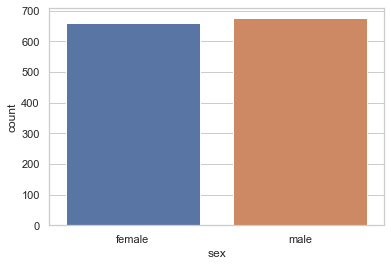

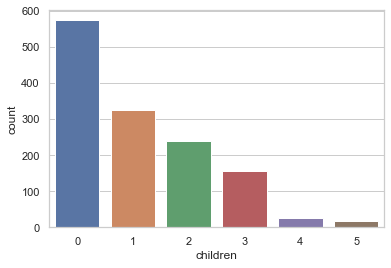

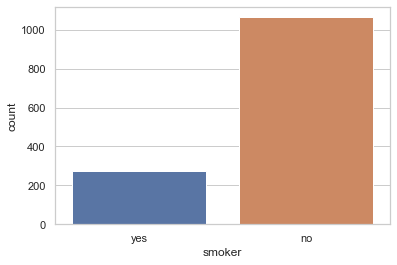

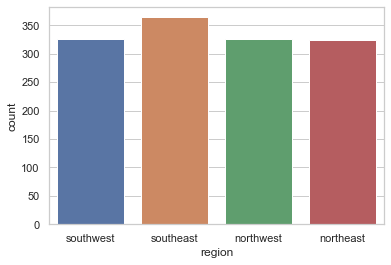

In [16]:
#Using seaborn countplot to plot and visualize distribution of Categorical columns - 
#sex, children, smoker and region.
#Considering children column as categorical.

print('\ncountplot to visualize distribution of Categorical columns - sex, children, smoker and region')
print('==============================================================================================\n')

for col in ['sex', 'children', 'smoker', 'region']:
    sns.countplot(x=col, data=ins_df)    
    plt.show()

In [17]:
print('\nThe countplots for distribution of Categorical columns - sex, children, smoker and region shows-\n')
print('Number of males are slightly more than the number of females.')
print('People having no children are more compared to those having 1, 2 3, 4 or 5 children.')
print('People having 4 and 5 children is very less.')
print('There are more number of non-smokers compared to smokers.')
print('Population from southeast region is slightly more compared to population from other regions.')
print('Population from southwest, northwest and northeast regions is nearly same.\n')


The countplots for distribution of Categorical columns - sex, children, smoker and region shows-

Number of males are slightly more than the number of females.
People having no children are more compared to those having 1, 2 3, 4 or 5 children.
People having 4 and 5 children is very less.
There are more number of non-smokers compared to smokers.
Population from southeast region is slightly more compared to population from other regions.
Population from southwest, northwest and northeast regions is nearly same.



### i. Pair plot that includes all the columns of the dataframe


pairplot to plot the numerical columns and the categorical column - smoker



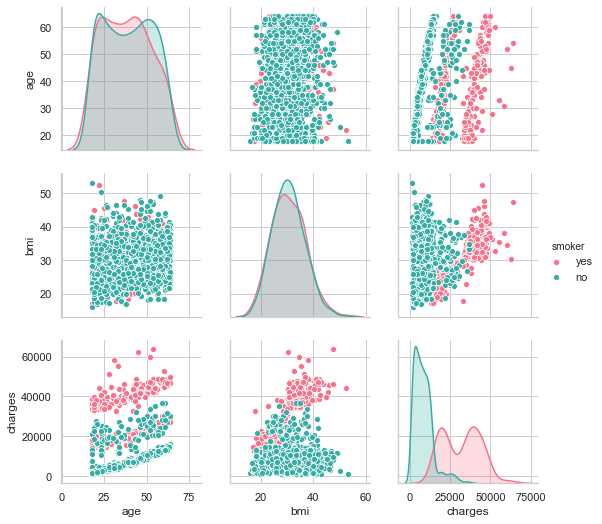

In [18]:
#Using seaborn pairplot to plot all Numerical and Categorical columns of the DataFrame - 
#Numerical columns : age, bmi, charges
#Categorical columns : smoker, sex, region, children.
#Considering children column as categorical.
#hue parameter is used to plot the relationship between each categorical variable with the Numerical variables
#taking one categorical variable at a time and plot 3 pairplots for the 3 categoriacal variables.

print('\npairplot to plot the numerical columns and the categorical column - smoker')
print('============================================================================\n')

sns.pairplot(ins_df, vars=['age', 'bmi', 'charges'], hue='smoker', palette='husl')
plt.show()


pairplot to plot the numerical columns and the categorical column - sex



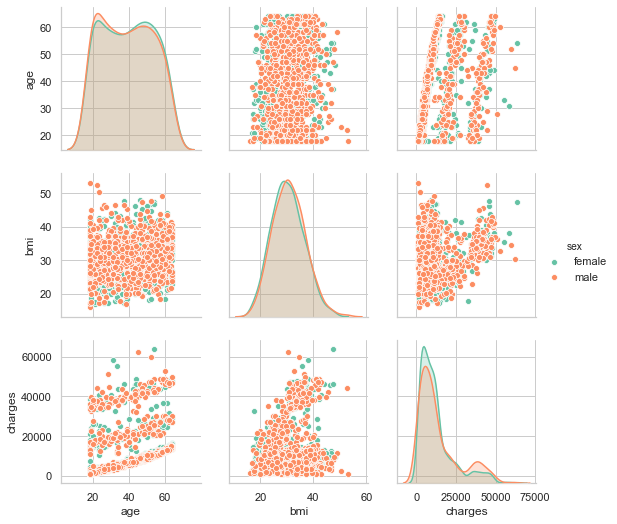

In [19]:
print('\npairplot to plot the numerical columns and the categorical column - sex')
print('=========================================================================\n')

sns.pairplot(ins_df, vars=['age', 'bmi', 'charges'], hue='sex', palette='Set2')
plt.show()


pairplot to plot the numerical columns and the categorical column - region



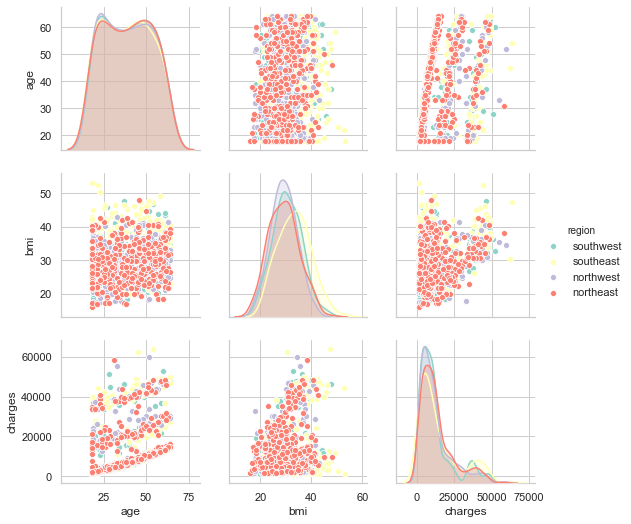

In [20]:
print('\npairplot to plot the numerical columns and the categorical column - region')
print('============================================================================\n')

sns.pairplot(ins_df, vars=['age', 'bmi', 'charges'], hue='region', palette='Set3')
plt.show()


pairplot to plot the numerical columns and the categorical column - children



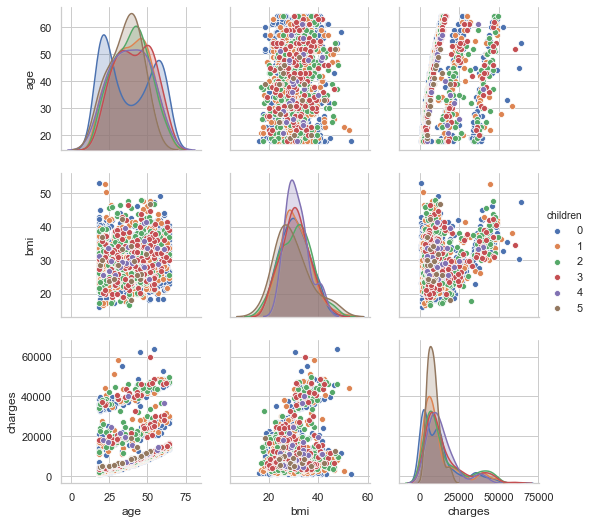

In [21]:
print('\npairplot to plot the numerical columns and the categorical column - children')
print('============================================================================\n')

sns.pairplot(ins_df, vars=['age', 'bmi', 'charges'], hue='children')
plt.show()

### 4. Answer the following questions with statistical evidence.

#### a. Do charges of people who smoke differ significantly from the people who don't?

###### H0 : Charges of people who smoke do not differ signigicantly from Charges of people who do not smoke
###### H1 : Charges of people who smoke differ signigicantly from Charges of people who do not smoke


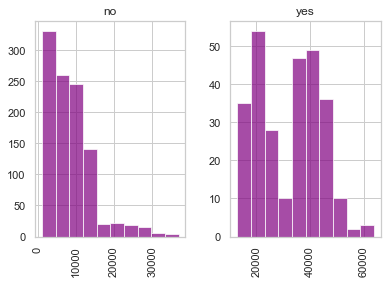

In [22]:
#histogram to visualize distribution of charges across smokers and non-smokers.

ins_df.hist(by='smoker', column='charges', color='purple', alpha=0.7)
plt.show()

In [23]:
print ('Observations from histogram')
print ('===========================')

print("The distribution for somkers and non-smokers for charges is not normal.")
print("The distribution for non-smokers is right-skewed.\n")

Observations from histogram
The distribution for somkers and non-smokers for charges is not normal.
The distribution for non-smokers is right-skewed.



In [24]:
#pivot_table to group non-smokers and smokers on charges to see the counts, mean and std.

pd.pivot_table(ins_df, index='smoker', values='charges', aggfunc=[len, np.mean, np.std], margins=True)

,len,mean,std
,charges,charges,charges
smoker,,,
no,1064.0,8434.268298,5993.781819
yes,274.0,32050.231832,11541.547176
All,1338.0,13270.422265,12105.484976


In [25]:
#create the datasets using np array to perform the tests.

smkr_chrgs = np.array(ins_df.loc[:,'charges'].where(ins_df['smoker'] == 'yes').dropna())
len(smkr_chrgs)

274

In [26]:
nonsmkr_chrgs = np.array(ins_df.loc[:,'charges'].where(ins_df['smoker'] == 'no').dropna())
len(nonsmkr_chrgs)

1064

In [27]:
# Shapiro-Wilk Test to test if a random sample is drawn from a normal distribution or not.
# Null Hypothesis: The input sample is from a population with normal distribution.
# Alternate Hypothesis: The input sample is not from a population with normal distribution.

t_statistic_s_chrgs, p_value_s_chrgs = shapiro(smkr_chrgs)
t_statistic_ns_chrgs, p_value_ns_chrgs = shapiro(nonsmkr_chrgs)

In [28]:
print ('Shapiro Test')
print ('============')

print("t_statistic_s_chrgs = ",t_statistic_s_chrgs, "  p_value_s_chrgs = ", p_value_s_chrgs)
print("t_statistic_ns_chrgs = ",t_statistic_ns_chrgs, "  p_value_ns_chrgs = ", p_value_ns_chrgs, '\n')

Shapiro Test
t_statistic_s_chrgs =  0.9395521879196167   p_value_s_chrgs =  3.6251879276250065e-09
t_statistic_ns_chrgs =  0.8728628158569336   p_value_ns_chrgs =  1.4455900162299346e-28 



In [29]:
print("\nSince the p-value is less than 0.05, we reject the Null Hypothesis.")
print("So, the input samples are not from populations with normal distribution.\n")
print("The distribution of populations are not normal\nand also the histogram shows that that the samples are not normally distributed.\n")
print("So, we perform the Mann Whitney U test i.e, Two-sample Wilcoxon-test on the datasets.\n")


Since the p-value is less than 0.05, we reject the Null Hypothesis.
So, the input samples are not from populations with normal distribution.

The distribution of populations are not normal
and also the histogram shows that that the samples are not normally distributed.

So, we perform the Mann Whitney U test i.e, Two-sample Wilcoxon-test on the datasets.



In [30]:
#Two-sample wilcoxon test
# also called Mann Whitney U - Used when samples are not normally distributed

u_statistic_chrgs, p_value_u_chrgs = mannwhitneyu(smkr_chrgs, nonsmkr_chrgs)

In [31]:
print ('Two-sample wilcoxon test or Mann Whitney U')
print ('==========================================')

print ("u_chrgs = ", u_statistic_chrgs, " p_value_u_chrgs = ", p_value_u_chrgs, '\n')

Two-sample wilcoxon test or Mann Whitney U
u_chrgs =  7403.0  p_value_u_chrgs =  2.6351167222517853e-130 



In [32]:
print("\nSince the p-value is less than 0.05, we reject the Null Hypothesis.")
print("So,Charges of people who smoke differ significantly from Charges of people who do not smoke\n")


Since the p-value is less than 0.05, we reject the Null Hypothesis.
So,Charges of people who smoke differ significantly from Charges of people who do not smoke



#### b. Does bmi of males differ significantly from that of females?

###### H0 : bmi of males does not differ signigicantly from bmi of females
###### H1 : bmi of males differs signigicantly from bmi of females

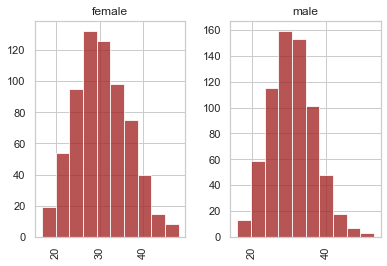

In [33]:
#histogram to visualize distribution of bmi across male and females.

ins_df.hist(by='sex', column='bmi', color='brown', alpha=0.8)
plt.show()

In [34]:
print ('Observations from histogram')
print ('===========================')

print("The distribution for females and male for bmi is approximately normal.\n")

Observations from histogram
The distribution for females and male for bmi is approximately normal.



In [35]:
#pivot_table to group male and females on bmi to see the counts, mean and std.

pd.pivot_table(ins_df, index='sex', values='bmi', aggfunc=[len, np.mean, np.std], margins=True)

,len,mean,std
,bmi,bmi,bmi
sex,,,
female,662.0,30.377749,6.046023
male,676.0,30.943129,6.140435
All,1338.0,30.663397,6.095908


In [36]:
#create the datasets using np array to perform the tests.

m_bmi = np.array(ins_df.loc[:,'bmi'].where(ins_df['sex']=='male').dropna())
len(m_bmi)

676

In [37]:
f_bmi = np.array(ins_df.loc[:,'bmi'].where(ins_df['sex']=='female').dropna())
len(f_bmi)

662

In [38]:
# Shapiro-Wilk Test to test if a random sample is drawn from a normal distribution or not.
# Null Hypothesis: The input sample is from a population with normal distribution.
# Alternate Hypothesis: The input sample is not from a population with normal distribution.

t_statistic_m_bmi, p_value_m_bmi = shapiro(m_bmi)
t_statistic_f_bmi, p_value_f_bmi = shapiro(f_bmi)

In [39]:
print ('Shapiro Test')
print ('============')

print("t_statistic_m_bmi = ",t_statistic_m_bmi, "  p_value_m_bmi = ", p_value_m_bmi)
print("t_statistic_f_bmi = ",t_statistic_f_bmi, "  p_value_f_bmi = ", p_value_f_bmi, '\n')

Shapiro Test
t_statistic_m_bmi =  0.9930475354194641   p_value_m_bmi =  0.003130641533061862
t_statistic_f_bmi =  0.9930257797241211   p_value_f_bmi =  0.0035433683078736067 



In [40]:
print("\nSince the p-value is less than 0.05, we reject the Null Hypothesis.")
print("So, the input samples are not from populations with normal distribution\n")
print("Though, the distribution of populations are not normal,\nthe histogram shows that that the samples are approximately normal.\n")
print("So, we perform the Two-sample t-test on the datasets.\n")


Since the p-value is less than 0.05, we reject the Null Hypothesis.
So, the input samples are not from populations with normal distribution

Though, the distribution of populations are not normal,
the histogram shows that that the samples are approximately normal.

So, we perform the Two-sample t-test on the datasets.



In [41]:
#Two-Sample t-test on m_bmi and f_bmi
#Null Hypothesis : bmi of males does not differ signigicantly from bmi of females.
#Alternate Hypothesis : bmi of males differs signigicantly from bmi of females.

t_statistic_bmi, p_value_bmi = ttest_ind(m_bmi, f_bmi)

In [42]:
print ('Two-Sample t-test')
print ('=================')

print("t_statistic = ",t_statistic_bmi, "\np_value = ", p_value_bmi, '\n')

Two-Sample t-test
t_statistic =  1.696752635752224 
p_value =  0.08997637178984932 



In [43]:
print("\nSince the p-value is greater than 0.05, we do not reject the Null Hypothesis.")
print("So, bmi of males does not differ signigicantly from bmi of females\n")


Since the p-value is greater than 0.05, we do not reject the Null Hypothesis.
So, bmi of males does not differ signigicantly from bmi of females



#### c. Is the proportion of smokers significantly different in different genders?

###### H0 : Proportion of smokers is not signigicantly different across genders 
###### H1 : Proportion of smokers is signigicantly different across genders 

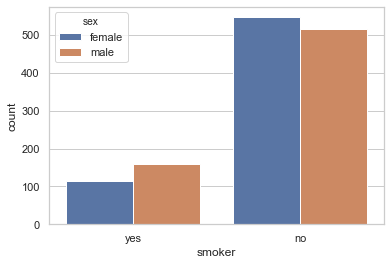

In [44]:
#countplot to visualize proportion of count of smokers across male and females.

sns.countplot(x='smoker', hue='sex', data=ins_df)
plt.show()

In [45]:
print ('Observations from countplot')
print ('===========================')

print("The count of non-somkers is more than count of smokers.")
print("The count of female non-smokers is more than male non-smokers.")
print("The count of female smokers is less than male smokers.\n")

Observations from countplot
The count of non-somkers is more than count of smokers.
The count of female non-smokers is more than male non-smokers.
The count of female smokers is less than male smokers.



In [46]:
#using crosstab function of pandas,create a contingency table to find counts of smokers and  non-smokers across genders

cont_sm_sx = pd.crosstab(ins_df['smoker'], ins_df['sex'], margins=True, margins_name='Total')
cont_sm_sx

sex,female,male,Total
smoker,,,
no,547,517,1064
yes,115,159,274
Total,662,676,1338


In [47]:
#chi2_contingency function to perform Chi-square test of independence of variables in a contingency table.
#Null Hypothesis : Proportion of smokers is not signigicantly different across genders.
#Alternate Hypothesis : Proportion of smokers is signigicantly different across genders.

chi2_stat, p_value_chi2, degree_of_freedom, expected_chi2 = chi2_contingency(cont_sm_sx)

In [48]:
print ('Chi square Test in a Contingency Table')
print ('======================================\n')

print("===Chi2 Stat===")
print(chi2_stat,'\n')

print("===Degrees of Freedom===")
print(degree_of_freedom,'\n')

print("===P-Value===")
print(p_value_chi2,'\n')

print("===Expected Freequencies===")
print(expected_chi2,'\n')

Chi square Test in a Contingency Table

===Chi2 Stat===
7.765921028604452 

===Degrees of Freedom===
4 

===P-Value===
0.10053907554919742 

===Expected Freequencies===
[[ 526.43348281  537.56651719 1064.        ]
 [ 135.56651719  138.43348281  274.        ]
 [ 662.          676.         1338.        ]] 



In [49]:
print("\nSince the p-value is greater than 0.05, we do not reject the Null Hypothesis.")
print("So, Proportion of smokers is not signigicantly different across genders.\n")


Since the p-value is greater than 0.05, we do not reject the Null Hypothesis.
So, Proportion of smokers is not signigicantly different across genders.



#### d. Is the distribution of bmi across women with no children, one child and two children, the same ?

##### H0: Distribution of bmi across women with no children, one child and two children is same
##### H1: Distribution of bmi across women with no children, one child and two children is not the same.

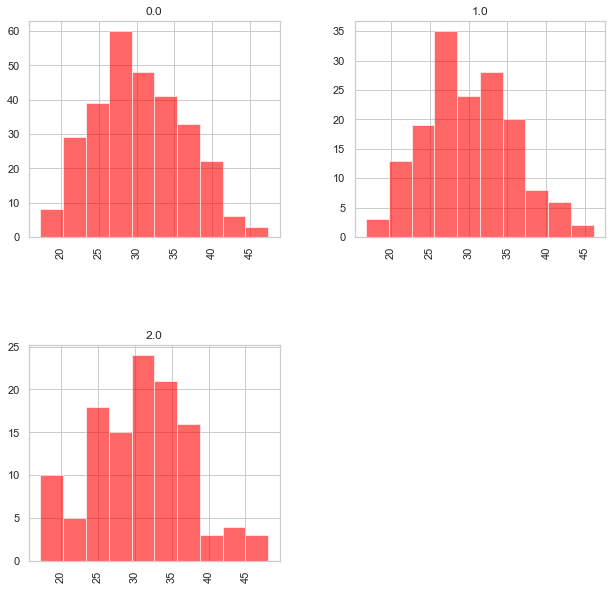

In [50]:
#histogram to visualize distribution of bmi for females with 0, 1 and 2 children.

#ins_df.where(ins_df['sex']=='female').dropna().hist(by='children', column='bmi', figsize=(10,10))
ins_df.where(ins_df['sex']=='female').where( (ins_df['children'] == 0) | (ins_df['children'] == 1) | 
(ins_df['children'] == 2) ).dropna().hist(by='children', column='bmi', color='red', figsize=(10,10), alpha=0.6)
plt.show()

In [51]:
print ('Observations from histogram')
print ('===========================')

print("The distribution of women having no children and one child for bmi is approximately normal.")
print("The distribution of women having two children is not normal.\n")

Observations from histogram
The distribution of women having no children and one child for bmi is approximately normal.
The distribution of women having two children is not normal.



In [52]:
#pivot_table to group male and females on number of children for bmi values to see the mean and std.

pd.pivot_table(ins_df.where( (ins_df['children'] == 0) | (ins_df['children'] == 1) | 
(ins_df['children'] == 2) ).dropna(), index='sex', columns='children', values='bmi', aggfunc=[np.mean, np.var])

mean                              var                      
children        0.0        1.0        2.0        0.0        1.0        2.0
sex                                                                       
female    30.361522  30.052658  30.649790  35.604304  33.487414  43.933034
male      30.741719  31.166145  31.300992  37.404890  40.403595  40.984977

In [53]:
#create the datasets using np array to perform the tests.

f_0_child = np.array(ins_df.loc[:,'bmi'].where(ins_df['sex']=='male').where(ins_df['children']==0).dropna())
len(f_0_child)

285

In [54]:
f_1_child = np.array(ins_df.loc[:,'bmi'].where(ins_df['sex']=='male').where(ins_df['children']==1).dropna())
len(f_1_child)

166

In [55]:
f_2_child = np.array(ins_df.loc[:,'bmi'].where(ins_df['sex']=='male').where(ins_df['children']==2).dropna())
len(f_2_child)

121

In [56]:
#Levene's Test to test that all input samples are from populations with equal variances.
#Null Hypothesis: All input samples are from populations with equal variances.
#Alternate Hypothesis: Atleast one of samples is from a population with variance not equal to other two.

levene_statistic, p_value_levene = levene(f_0_child, f_1_child, f_2_child)

In [57]:
print ('Levene Test')
print ('===========')
print ('Levene Result Statistic:', levene_statistic)
print ('Levene Result p_value:', p_value_levene, '\n')

Levene Test
Levene Result Statistic: 0.37496089212985007
Levene Result p_value: 0.6874858603237276 



In [58]:
print("\nSince the p-value is greater than 0.05, we do not reject the Null Hypothesis.")
print("So, All input samples are from populations with equal variances.\n")
print("Equality of variances using Levene's test is satisfied.So,we can depend on the result of ANOVA.\n")


Since the p-value is greater than 0.05, we do not reject the Null Hypothesis.
So, All input samples are from populations with equal variances.

Equality of variances using Levene's test is satisfied.So,we can depend on the result of ANOVA.



In [59]:
# One-Way ANOVA Test
# Null Hypothesis: Distribution of bmi across women with no children, one child and two children is same.
# Alternate Hypothesis: Distribution of bmi across women with no children, one child and two children is not the same.

f_statistic, p_value_anova = f_oneway(f_0_child, f_1_child, f_2_child)

In [60]:
print ('One-way ANOVA')
print ('=============')
print ('f_statistic - ANOVA test :', f_statistic)
print ('p_value - ANOVA test :', p_value_anova, '\n')

One-way ANOVA
f_statistic - ANOVA test : 0.44062803698094083
p_value - ANOVA test : 0.6438514991545312 



In [61]:
print("\nSince the p-value is greater than 0.05, we do not reject the Null Hypothesis.")
print("So, the distribution of bmi across women with 0, 1 and 2 children is same.\n")


Since the p-value is greater than 0.05, we do not reject the Null Hypothesis.
So, the distribution of bmi across women with 0, 1 and 2 children is same.

